# Remove outliers which are > q3 + 5*iqr

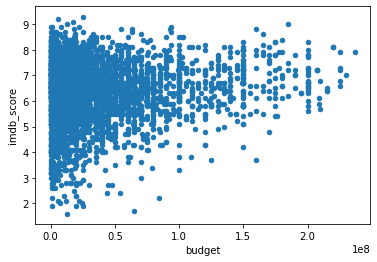

In [1]:
%matplotlib inline
import pandas as pd

df = pd.read_csv('data/movie_metadata.csv')

# IQR 계산하기
q1 = df['budget'].quantile(0.25)
q3 = df['budget'].quantile(0.75)
iqr = q3 - q1

# 이상점 제거하기
condition = (df['budget'] > q3 + 5 * iqr)
df.drop(df[condition].index, inplace=True)

# 산점도 그리기
df.plot(kind='scatter', x= 'budget', y='imdb_score')

## Another Way

In [2]:
%matplotlib inline
import pandas as pd

df = pd.read_csv('data/movie_metadata.csv')

df.head()

,title,year,genres,director,actor_1,actor_2,actor_3,language,country,budget,imdb_score,movie_facebook_likes,cast_total_facebook_likes
0,Avatar,2009.0,Action|Adventure|Fantasy|Sci-Fi,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,English,USA,237000000.0,7.9,33000,4834
1,Pirates of the Caribbean: At World's End,2007.0,Action|Adventure|Fantasy,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,English,USA,300000000.0,7.1,0,48350
2,Spectre,2015.0,Action|Adventure|Thriller,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,English,UK,245000000.0,6.8,85000,11700
3,The Dark Knight Rises,2012.0,Action|Thriller,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,English,USA,250000000.0,8.5,164000,106759
4,Star Wars: Episode VII - The Force Awakens ...,NaN,Documentary,Doug Walker,Doug Walker,Rob Walker,NaN,NaN,NaN,NaN,7.1,0,143


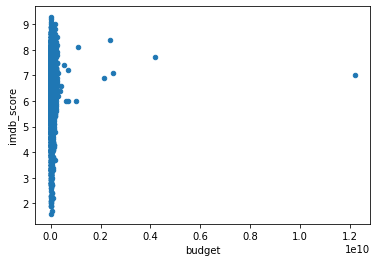

In [3]:
df.plot(kind='scatter', x='budget', y='imdb_score')

In [4]:
q1 = df['budget'].quantile(0.25)
q1

6000000.0

In [5]:
q3 = df['budget'].quantile(0.75)
q3

45000000.0

In [6]:
iqr = q3 - q1
iqr

39000000.0

In [7]:
condition = df['budget'] > q3 + 5 * iqr
df[condition]

,title,year,genres,director,actor_1,actor_2,actor_3,language,country,budget,imdb_score,movie_facebook_likes,cast_total_facebook_likes
1,Pirates of the Caribbean: At World's End,2007.0,Action|Adventure|Fantasy,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,English,USA,3.000000e+08,7.1,0,48350
2,Spectre,2015.0,Action|Adventure|Thriller,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,English,UK,2.450000e+08,6.8,85000,11700
3,The Dark Knight Rises,2012.0,Action|Thriller,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,English,USA,2.500000e+08,8.5,164000,106759
5,John Carter,2012.0,Action|Adventure|Sci-Fi,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,English,USA,2.637000e+08,6.6,24000,1873
6,Spider-Man 3,2007.0,Action|Adventure|Romance,Sam Raimi,J.K. Simmons,James Franco,Kirsten Dunst,English,USA,2.580000e+08,6.2,0,46055
7,Tangled,2010.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Nathan Greno,Brad Garrett,Donna Murphy,M.C. Gainey,English,USA,2.600000e+08,7.8,29000,2036
8,Avengers: Age of Ultron,2015.0,Action|Adventure|Sci-Fi,Joss Whedon,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,English,USA,2.500000e+08,7.5,118000,92000
9,Harry Potter and the Half-Blood Prince,2009.0,Adventure|Family|Fantasy|Mystery,David Yates,Alan Rickman,Daniel Radcliffe,Rupert Grint,English,UK,2.500000e+08,7.5,10000,58753
10,Batman v Superman: Dawn of Justice,2016.0,Action|Adventure|Sci-Fi,Zack Snyder,Henry Cavill,Lauren Cohan,Alan D. Purwin,English,USA,2.500000e+08,6.9,197000,24450
18,Pirates of the Caribbean: On Stranger Tides,2011.0,Action|Adventure|Fantasy,Rob Marshall,Johnny Depp,Sam Claflin,Stephen Graham,English,USA,2.500000e+08,6.7,58000,54083


In [8]:
outlier_index = df[condition].index
outlier_index

Int64Index([   1,    2,    3,    5,    6,    7,    8,    9,   10,   18,   20,
              27, 1016, 1338, 2323, 2334, 2740, 2988, 3005, 3075, 3273, 3311,
            3423, 3461, 3851, 3859, 4542],
           dtype='int64')

In [9]:
df.drop(outlier_index, inplace=True)

# Remove outliers which are the biggest 15

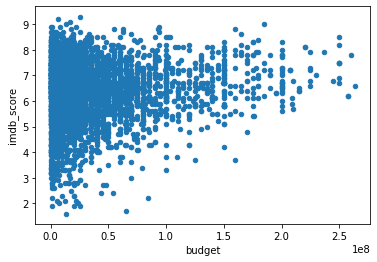

In [10]:
%matplotlib inline
import pandas as pd

# 데이터 불러오기
df = pd.read_csv('data/movie_metadata.csv')

# 이상점 제거하기
drop_index = df['budget'].sort_values(ascending=False).head(15).index
df.drop(drop_index, inplace=True)

# 산점도 그리기
df.plot(kind='scatter', x= 'budget', y='imdb_score')

## Another Way

In [11]:
%matplotlib inline
import pandas as pd

df = pd.read_csv('data/movie_metadata.csv')
df

,title,year,genres,director,actor_1,actor_2,actor_3,language,country,budget,imdb_score,movie_facebook_likes,cast_total_facebook_likes
0,Avatar,2009.0,Action|Adventure|Fantasy|Sci-Fi,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,English,USA,237000000.0,7.9,33000,4834
1,Pirates of the Caribbean: At World's End,2007.0,Action|Adventure|Fantasy,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,English,USA,300000000.0,7.1,0,48350
2,Spectre,2015.0,Action|Adventure|Thriller,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,English,UK,245000000.0,6.8,85000,11700
3,The Dark Knight Rises,2012.0,Action|Thriller,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,English,USA,250000000.0,8.5,164000,106759
4,Star Wars: Episode VII - The Force Awakens ...,NaN,Documentary,Doug Walker,Doug Walker,Rob Walker,NaN,NaN,NaN,NaN,7.1,0,143
5,John Carter,2012.0,Action|Adventure|Sci-Fi,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,English,USA,263700000.0,6.6,24000,1873
6,Spider-Man 3,2007.0,Action|Adventure|Romance,Sam Raimi,J.K. Simmons,James Franco,Kirsten Dunst,English,USA,258000000.0,6.2,0,46055
7,Tangled,2010.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Nathan Greno,Brad Garrett,Donna Murphy,M.C. Gainey,English,USA,260000000.0,7.8,29000,2036
8,Avengers: Age of Ultron,2015.0,Action|Adventure|Sci-Fi,Joss Whedon,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,English,USA,250000000.0,7.5,118000,92000
9,Harry Potter and the Half-Blood Prince,2009.0,Adventure|Family|Fantasy|Mystery,David Yates,Alan Rickman,Daniel Radcliffe,Rupert Grint,English,UK,250000000.0,7.5,10000,58753


In [12]:
## First 15 top budget movies
top_movies = df.sort_values(by='budget', ascending=False)[:15]
top_movies

,title,year,genres,director,actor_1,actor_2,actor_3,language,country,budget,imdb_score,movie_facebook_likes,cast_total_facebook_likes
2988,The Host,2006.0,Comedy|Drama|Horror|Sci-Fi,Joon-ho Bong,Doona Bae,Kang-ho Song,Ah-sung Ko,Korean,South Korea,1.221550e+10,7.0,7000,1173
3859,Lady Vengeance,2005.0,Crime|Drama,Chan-wook Park,Min-sik Choi,Yeong-ae Lee,Hye-jeong Kang,Korean,South Korea,4.200000e+09,7.7,4000,907
3005,Fateless,2005.0,Drama|Romance|War,Lajos Koltai,Marcell Nagy,Péter Fancsikai,Bálint Péntek,Hungarian,Hungary,2.500000e+09,7.1,607,11
2323,Princess Mononoke,1997.0,Adventure|Animation|Fantasy,Hayao Miyazaki,Minnie Driver,Jada Pinkett Smith,Billy Crudup,Japanese,Japan,2.400000e+09,8.4,11000,2710
2334,Steamboy,2004.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,Katsuhiro Ôtomo,William Hootkins,Robin Atkin Downes,Rosalind Ayres,Japanese,Japan,2.127520e+09,6.9,973,991
3423,Akira,1988.0,Action|Animation|Sci-Fi,Katsuhiro Ôtomo,Mitsuo Iwata,Takeshi Kusao,Tesshô Genda,Japanese,Japan,1.100000e+09,8.1,0,28
4542,Godzilla 2000,1999.0,Action|Adventure|Drama|Sci-Fi|Thriller,Takao Okawara,Hiroshi Abe,Naomi Nishida,Sakae Kimura,Japanese,Japan,1.000000e+09,6.0,339,53
3075,Kabhi Alvida Naa Kehna,2006.0,Drama,Karan Johar,Shah Rukh Khan,John Abraham,Preity Zinta,Hindi,India,7.000000e+08,6.0,659,10822
3851,Tango,1998.0,Drama|Musical,Carlos Saura,Mía Maestro,Juan Luis Galiardo,Miguel Ángel Solá,Spanish,Spain,7.000000e+08,7.2,539,371
3273,Kites,2010.0,Action|Drama|Romance|Thriller,Anurag Basu,Bárbara Mori,Steven Michael Quezada,Kabir Bedi,English,India,6.000000e+08,6.0,0,1836


In [13]:
df.drop(top_movies.index, inplace=True)
df

,title,year,genres,director,actor_1,actor_2,actor_3,language,country,budget,imdb_score,movie_facebook_likes,cast_total_facebook_likes
0,Avatar,2009.0,Action|Adventure|Fantasy|Sci-Fi,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,English,USA,237000000.0,7.9,33000,4834
2,Spectre,2015.0,Action|Adventure|Thriller,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,English,UK,245000000.0,6.8,85000,11700
3,The Dark Knight Rises,2012.0,Action|Thriller,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,English,USA,250000000.0,8.5,164000,106759
4,Star Wars: Episode VII - The Force Awakens ...,NaN,Documentary,Doug Walker,Doug Walker,Rob Walker,NaN,NaN,NaN,NaN,7.1,0,143
5,John Carter,2012.0,Action|Adventure|Sci-Fi,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,English,USA,263700000.0,6.6,24000,1873
6,Spider-Man 3,2007.0,Action|Adventure|Romance,Sam Raimi,J.K. Simmons,James Franco,Kirsten Dunst,English,USA,258000000.0,6.2,0,46055
7,Tangled,2010.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Nathan Greno,Brad Garrett,Donna Murphy,M.C. Gainey,English,USA,260000000.0,7.8,29000,2036
8,Avengers: Age of Ultron,2015.0,Action|Adventure|Sci-Fi,Joss Whedon,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,English,USA,250000000.0,7.5,118000,92000
9,Harry Potter and the Half-Blood Prince,2009.0,Adventure|Family|Fantasy|Mystery,David Yates,Alan Rickman,Daniel Radcliffe,Rupert Grint,English,UK,250000000.0,7.5,10000,58753
10,Batman v Superman: Dawn of Justice,2016.0,Action|Adventure|Sci-Fi,Zack Snyder,Henry Cavill,Lauren Cohan,Alan D. Purwin,English,USA,250000000.0,6.9,197000,24450


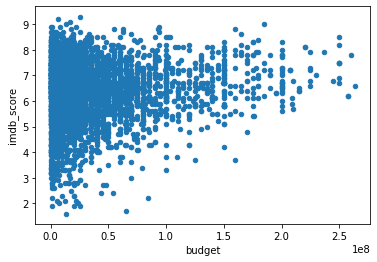

In [14]:
df.plot(kind='scatter', x='budget', y='imdb_score')